# Business Problem

This dataset contains information about drug classification based on patient general information and its diagnosis.Machine learning model is needed in order to predict the outcome of the drugs type the might be suitable for the patient.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Reading DataSet:

In [3]:
df_drug = pd.read_csv("drug200.csv")

In [4]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df_drug['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [6]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Initial DataSet Exploration

##### Categorical Variables

In [7]:
df_drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [8]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [9]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [10]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

The distribution of Cholesterol level is balanced

### Numerical Values

In [11]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness:',skewAge)

Age skewness: 0.03030835703000607


In [13]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness:', skewAge)

Na to K skewness: 0.03030835703000607


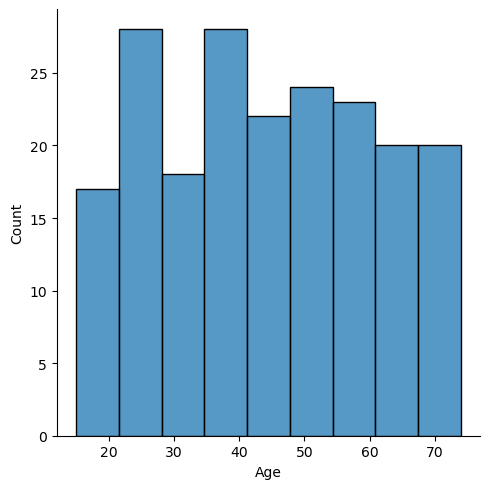

In [14]:
sns.displot(df_drug['Age']);

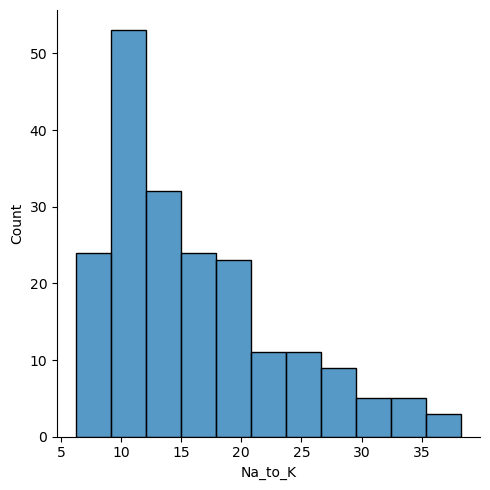

In [15]:
sns.displot(df_drug['Na_to_K']);

The distribution of 'Age' column is symetric ,since the skewness value between -0.5 and 0.5

### EDA

##### Drug Type Distribution

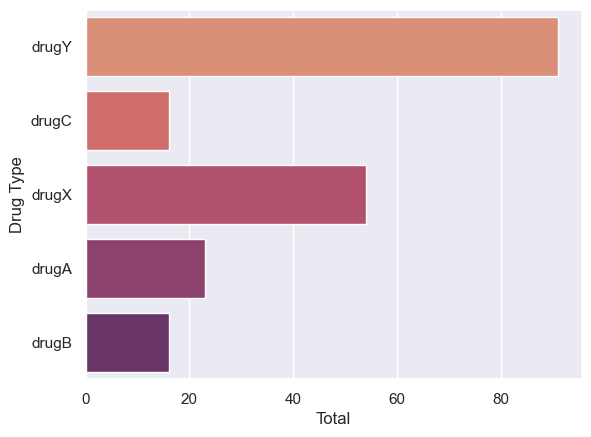

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug",data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

#### Gender Distribution

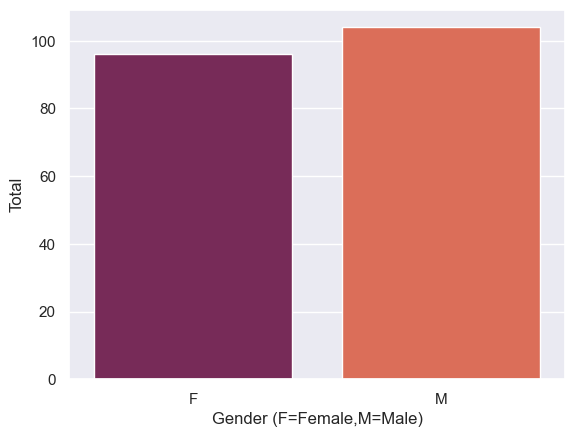

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex",data=df_drug,palette="rocket")
plt.xlabel('Gender (F=Female,M=Male)')
plt.ylabel('Total')
plt.show()

#### Blood Pressure Distribution

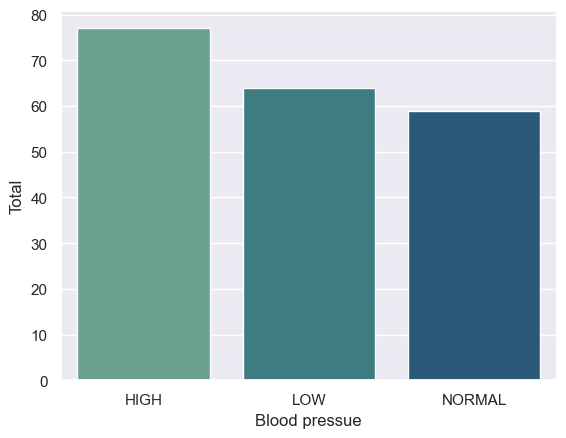

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(x="BP",data=df_drug,palette="crest")
plt.xlabel('Blood pressue')
plt.ylabel('Total')
plt.show()

#### Cholesterol Distribution

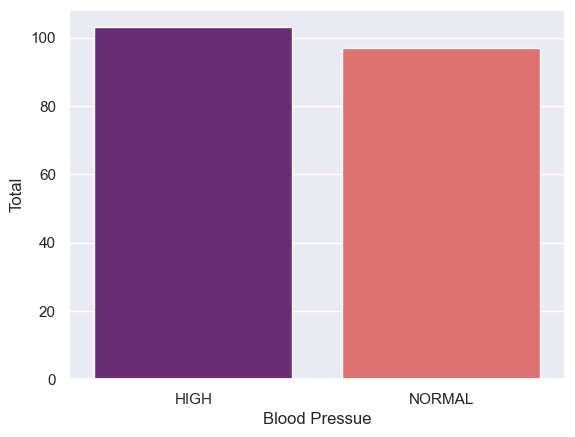

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol",data=df_drug,palette="magma")
plt.xlabel('Blood Pressue')
plt.ylabel('Total')
plt.show()

#### Gender Distribution based on Drug Type

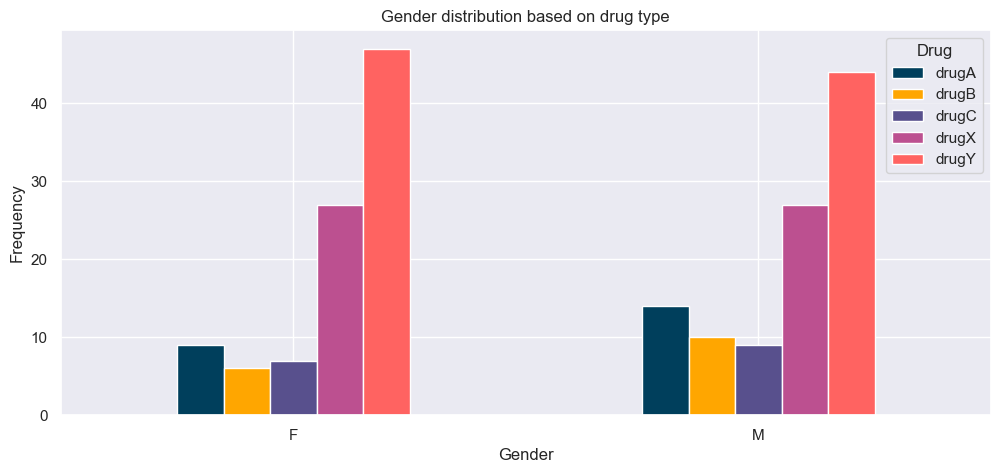

In [20]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Blood Pressure Distribution based on Cholesterol

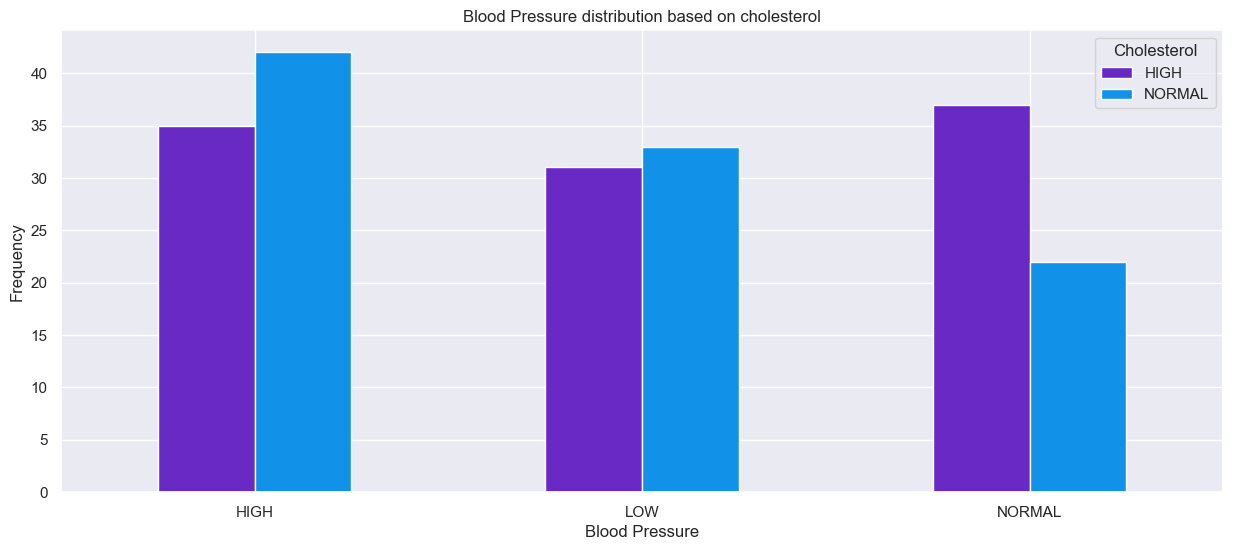

In [21]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Sodium to potassium Distribution based on Gender and Age

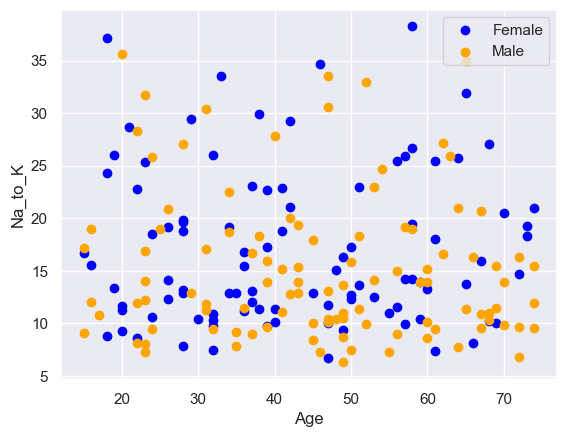

In [22]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'],y=df_drug.Na_to_K[(df_drug.Sex=='F')],c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'],y=df_drug.Na_to_K[(df_drug.Sex=='M')],c="Orange")
plt.legend(["Female","Male"])
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

### Dataset Preparation

#### Data Binning

Age:
    The age will be divided into 7 age categories
     *  Below 20
        20-29
        30-39
        40-49
        50-59
        60-69
        above 69

In [23]:
bin_age = [0,19,29,39,49,59,69,80]
category_age = ['<20s','20s','30s','40s','50s','60s','>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'],bins=bin_age,labels=category_age)
df_drug = df_drug.drop(['Age'],axis=1)

#### Na to K

In [24]:
bin_NatoK = [0,9,19,29,50]
category_NatoK = ['<10','10-20','20-30','>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'],bins=bin_NatoK,labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'],axis=1)

#### Splitting the dataset

The dataset will be splitt into 70% training and 30% testing

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [26]:
X = df_drug.drop(["Drug"],axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state = 0)


### Feature Engineering

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
X_train['Sex'].unique()

array(['M', 'F'], dtype=object)

In [29]:
X_train['BP'].unique()

array(['LOW', 'NORMAL', 'HIGH'], dtype=object)

In [30]:
X_train['Cholesterol'].unique()

array(['NORMAL', 'HIGH'], dtype=object)

In [31]:
X_train['Na_to_K_binned'].unique()

['>30', '10-20', '20-30', '<10']
Categories (4, object): ['<10' < '10-20' < '20-30' < '>30']

In [32]:
myTest = X_train.iloc[0:2]
myTest

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
131,M,LOW,NORMAL,50s,>30
96,F,LOW,HIGH,50s,>30


In [33]:
encoder=OneHotEncoder()

In [34]:
X_train = pd.DataFrame(encoder.fit_transform(X_train).toarray())
X_test = pd.DataFrame(encoder.fit_transform(X_test).toarray())


In [35]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [36]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
from imblearn.over_sampling import SMOTE
X_train, y_trin = SMOTE().fit_resample(X_train,y_train)

C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


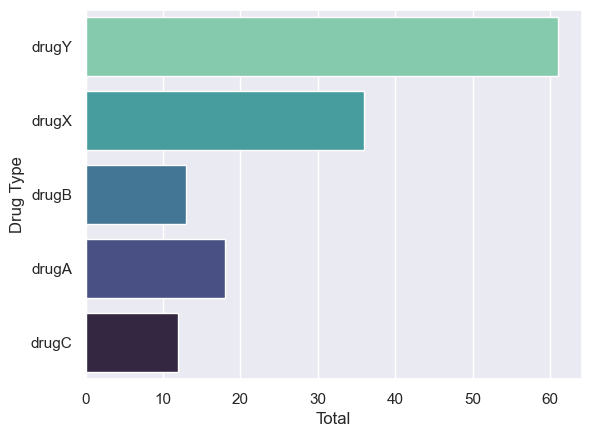

In [38]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,data=df_drug,palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

As can be seen the distribution of drug type are now balanced

### Model

##### Logistic Regression

In [43]:
# Split into train and test sets (for demonstration purposes, using the same data)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


encoder = OneHotEncoder(sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=encoder.get_feature_names_out(X.columns))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train_res, y_train_res)
y_pred = LRclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
LRAcc = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc * 100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Logistic Regression accuracy is: 85.00%


### K Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
# Train the K-Nearest Neighbors model
knn_classifier = KNeighborsClassifier(n_neighbors=20)
knn_classifier.fit(X_train_res, y_train_res)
y_pred = knn_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
KNNAcc = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbors accuracy is: {:.2f}%'.format(KNNAcc * 100))

              precision    recall  f1-score   support

       drugA       0.22      0.40      0.29         5
       drugB       0.22      0.67      0.33         3
       drugC       0.50      1.00      0.67         4
       drugX       0.69      1.00      0.82        18
       drugY       1.00      0.27      0.42        30

    accuracy                           0.57        60
   macro avg       0.53      0.67      0.50        60
weighted avg       0.77      0.57      0.54        60

[[ 2  3  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 6  4  4  8  8]]
K-Nearest Neighbors accuracy is: 56.67%


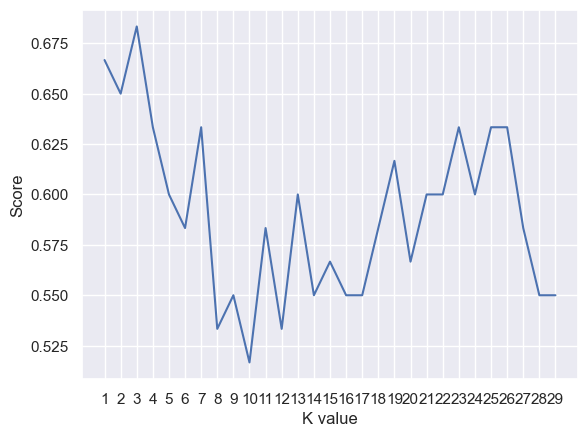

In [45]:
scoreListknn = []
for i in range(1, 30):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train_res, y_train_res)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

# Plotting the K values against their scores
plt.plot(range(1, 30), scoreListknn)
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

### Support Vector machine

In [46]:
from sklearn.svm import SVC

# Train the Support Vector Machine model
svm_classifier = SVC(kernel='linear',max_iter=251, random_state=0)
svm_classifier.fit(X_train_res, y_train_res)
y_pred_svm = svm_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# Calculate accuracy
SVMAcc = accuracy_score(y_test, y_pred_svm)
print('Support Vector Machine accuracy is: {:.2f}%'.format(SVMAcc * 100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Support Vector Machine accuracy is: 85.00%


C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Naive Bayes

###### Categorical NB

In [47]:
from sklearn.naive_bayes import CategoricalNB

# Train the Categorical Naive Bayes model
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train_res, y_train_res)
y_pred_nb = nb_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

# Calculate accuracy
NBAcc = accuracy_score(y_test, y_pred_nb)
print('Categorical Naive Bayes accuracy is: {:.2f}%'.format(NBAcc * 100))


              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.67      0.80        30

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Categorical Naive Bayes accuracy is: 83.33%


#### Gaussian NB

In [48]:
from sklearn.naive_bayes import GaussianNB

# Train the Gaussian Naive Bayes model
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_res, y_train_res)
y_pred_gnb = gnb_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

# Calculate accuracy
GNBAcc = accuracy_score(y_test, y_pred_gnb)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(GNBAcc * 100))


              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Gaussian Naive Bayes accuracy is: 85.00%


### Model Comparison

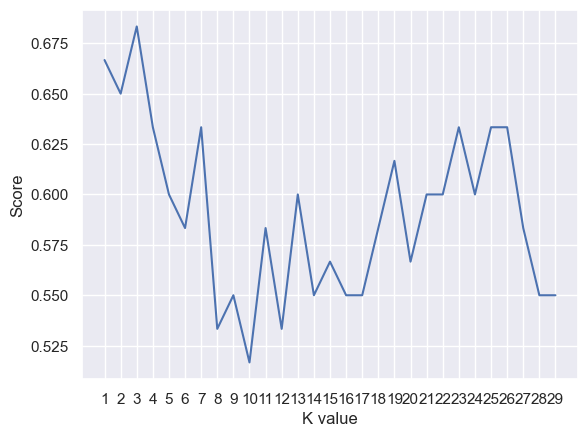

In [63]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1, 30):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train_res, y_train_res)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1, 30), scoreListknn)
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

# Find the maximum accuracy and corresponding K value
KNNAccMax = max(scoreListknn)


In [66]:
compare = pd.DataFrame({'Model':['Logistic Regression','K Neighbors','K Neighbors Max','SVM','Categorical NB','Gaussian NB'],
                       'Accuracy':[LRAcc*100,KNNAcc*100,KNNAccMax*100,SVMAcc*100,NBAcc*100,NBAcc*100]})
compare.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
0,Logistic Regression,85.000000
3,SVM,85.000000
4,Categorical NB,83.333333
5,Gaussian NB,83.333333
2,K Neighbors Max,68.333333
1,K Neighbors,56.666667


In [67]:
import pickle

In [68]:
pickle.dump(LRclassifier,open('finalModel.pk1','wb'))


In [69]:
pickle.dump(encoder,open('finalEncoder.pk1','wb'))


In [71]:
model = pickle.load(open('finalModel.pk1','rb'))

In [72]:
enc = pickle.load(open('finalEncoder.pk1','rb'))

In [73]:
tt = np.array([['M','NORMAL','NORMAL','40s','>30']])

In [74]:
sc = enc.transform(tt)

C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [75]:
model.predict(sc)

C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)